## Введение

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Цель анализа: выявить определяющие успешность игры закономерности.

#### Оглавление
1. [Открытие файла и изучение общей информации](#1)
2. [Подготовка данных](#2)
3. [Проведение исследовательского анализа данных](#3)
4. [Портрет пользователя каждого региона](#4)
5. [Проверка гипотез](#5)
6. [Общий вывод](#6)

## 1. Открытие файла и изучение общей информации <a id='1'></a>

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
data=pd.read_csv('datasets/games.csv')
print(data.info())
display(data)
print(data['Rating'].value_counts())
print(data['User_Score'].value_counts())
print("Значений tbd {:.0%}".format(2424/len(data)))
print("Пропущенных значений в столбце 'год выпуска': {:.0%}".format(data['Year_of_Release'].isnull().sum()/len(data)))
print("Таблица содержит {:.0f} дубликатов".format(data.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
0.7       2
1.3       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64
Значений tbd 15%
Пропущенных значений в столбце 'год выпуска': 2%
Таблица содержит 0 дубликатов


Пропуски присутствуют в столбцах year_of_release-год выпуска, user_score-оценка пользователей, rating-рейтинг от организации ESRB и critic_score-оценка критиков. В столбце year_of_release-год выпуска пропущенные значения составляют всего лишь 2% от всех 16715 строк таблицы, поэтому удаление строк, содержащих пропущенное значение "год выпуска" не отразится на информативности анализа.Тип столбца year_of_release-год выпуска- необходимо заменить с float на int, т.к. год может быть только целым числом. Тип столбца user_score -оценка пользователей- необходимо заменить на float, т.к. оценка производилась в баллах, но в этом столбце присутствуют значения tbd. Значений tbd 2424, что составляет 15%, что достаточно много по отношению к всей таблице. ПОэтому их удаление может повлиять на информативность анализа. Дубликатов в таблице не найдено.

### 2. Подготовка данных <a id='2'></a>

#### Замена названий столбцов

In [2]:
data.columns = data.columns.str.lower()
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Удаление строк, содержащих пропущенное значение в столбце "год выпуска"

In [3]:
data.dropna(subset=['year_of_release'], inplace=True)
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Преобразование типов столбцов

In [4]:
data['year_of_release']=data['year_of_release'].astype('int')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


#### создание столбца, содержащего суммарные продажи во всех регионах

In [5]:
data['sum_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### 3. Проведение исследовательского анализа данных <a id='3'></a>

#### Ответ на вопрос: сколько игр выпускалось в разные годы

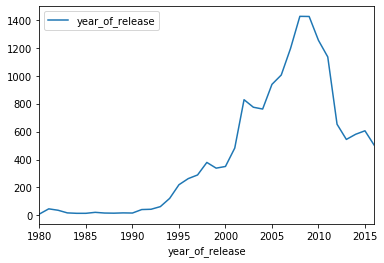

In [6]:
year_grouped=data.groupby(['year_of_release']).agg({'year_of_release':'count'})
year_grouped.plot()
plt.show()


График демонстрирует, что до 1993 выпускалось немного игр, резкий рост начался после 1993 и максимальное значение было достигнуто в 2007-2008гг, затем производство игр пошло на спад. 

#### Ответ на вопрос: как менялись продажи по платформам

,sum_sales
platform,
2600,86.48
3DO,0.10
3DS,257.81
DC,15.95
DS,802.78
GB,254.43
GBA,312.88
GC,196.73
GEN,30.77


Платформы с наибольшими суммарными продажами: 
          sum_sales
platform           
PS2         1233.56
X360         961.24
PS3          931.34
Wii          891.18
DS           802.78
PS           727.58
PS4          314.14
GBA          312.88
PSP          289.53
3DS          257.81
Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')


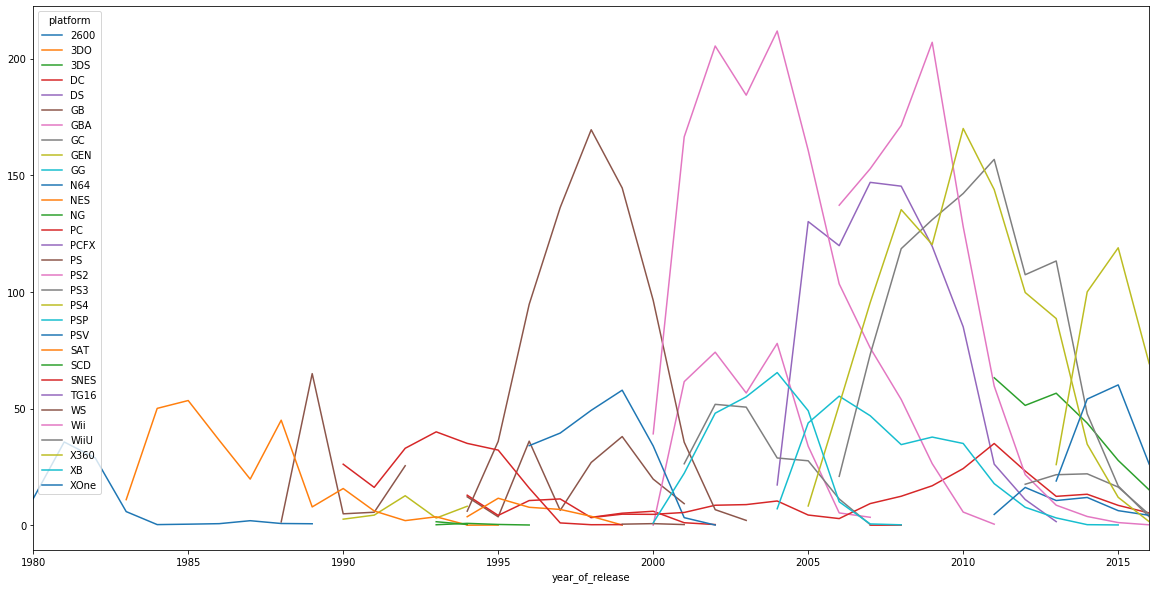

In [7]:
pd.pivot_table(data, index='year_of_release',columns='platform', values='sum_sales', aggfunc='sum').plot(figsize=(20,10))
piv_t=pd.pivot_table(data, index=['platform'], values='sum_sales', aggfunc='sum')
display(piv_t)
top10_platform=piv_t.sort_values(by='sum_sales', ascending=False).head(10)
print("Платформы с наибольшими суммарными продажами: ")
print(top10_platform)
print(top10_platform.index)

#### Определяем характерный срок жизни платформы

In [8]:
min=10
df1=data.groupby(['platform','year_of_release']).agg({'sum_sales':'sum'}).reset_index()
df1=df1.query('sum_sales>@min')
df1=df1.groupby(['platform']).agg({'year_of_release':'nunique'}).rename(columns={'year_of_release':'lifetime'})
median_lifetime=int(df1.median()[0])
print('Медианное время жизни платформы при минимальном уровне продаж, равном {}, составляет {} лет'.format(min,median_lifetime))

Медианное время жизни платформы при минимальном уровне продаж, равном 10, составляет 6 лет


Расчеты подтверждают графические данные: в среднем, характерный срок жизни платформы составляет около 6 лет.

#### Проанализируем данные за актуальный период (2014-2016гг)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


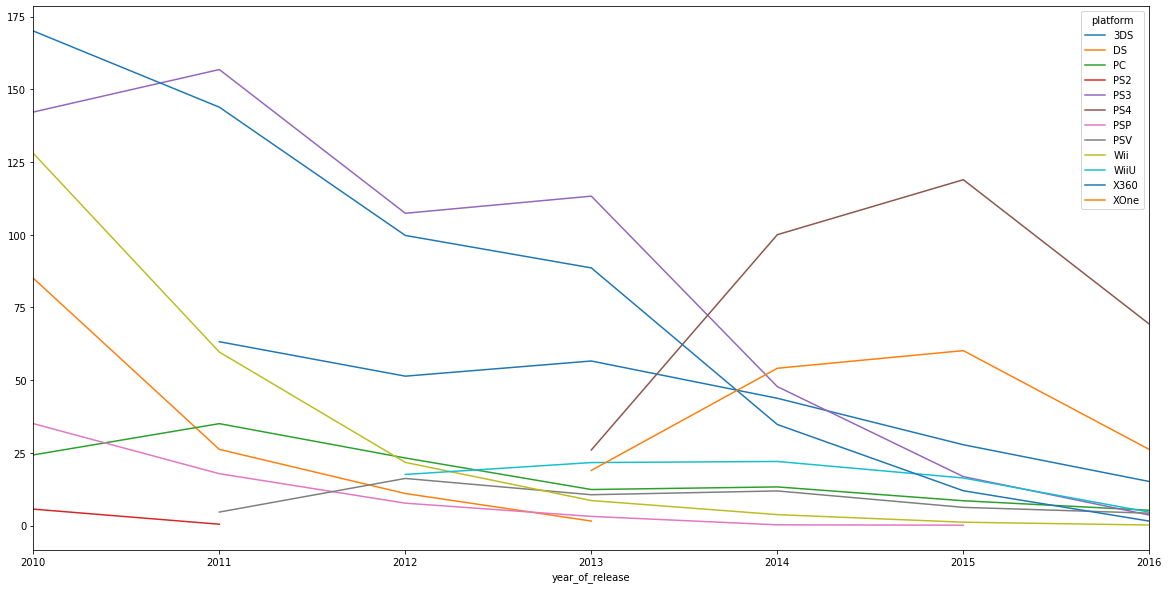

In [9]:
df=data.query('2010<=year_of_release<=2016')
display(df)
pd.pivot_table(df, index='year_of_release',columns='platform', values='sum_sales', aggfunc='sum').plot(figsize=(20,10))

Т.к. цель проекта-планирование кампании на 2017г, то интерес представляют последние года, равные арактерному сроку жизни платформы (т.е. 2010-2016г). Выведем эти данные в отдельную таблицу df.График демонстрирует, что продажи игр на всех платформах падают или остаются на том же уровне. На 1м месте по продажам **PS4**, на 2м - **XOne**, на 3м - **3DS**. Продажи игр на платформе **Wii** пусть относительно других не высокие, но на протяжении 3 лет стабильные: не растут, но и не падают. За счёт этой особенности платформу **Wii** также можно считать потенциально прибыльной. В дальнейшем анализе будем их считать потенциально прибыльными.

#### График "ящик с усами" по глобальным продажам игр для актуального периода

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


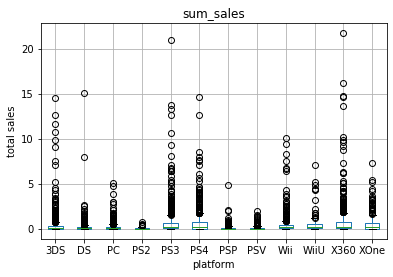

In [10]:
import matplotlib.pyplot as plt
df.boxplot(by='platform',column='sum_sales')
plt.ylabel('total sales')
plt.suptitle('')
plt.show()

График подтверждает прибыльность платформ: PS4, XOne, 3DS и Wii

#### Диаграмма рассеяния и корреляция между отзывами и продажами

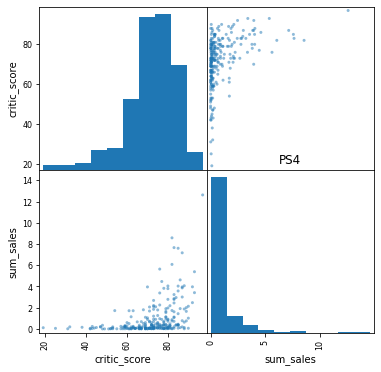

Корреляция между оценка критиков и продажами для платформы PS4:  0.40656790206178095
Корреляция между оценками пользователей и продажами для платформы PS4:  -0.031957110204556424
Корреляция между оценка критиков и продажами:  0.31701229473073017
Корреляция между оценками пользователей и продажами:  0.05536457082726418


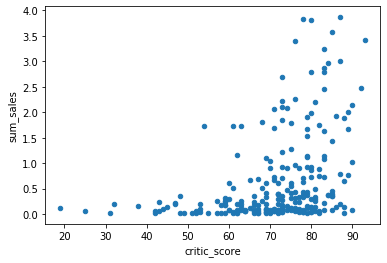

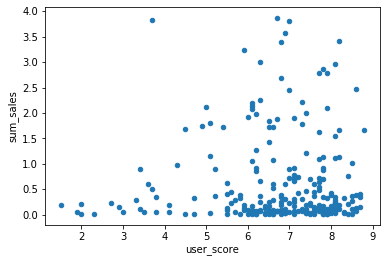

In [11]:
df_PS4=df.query('platform=="PS4"')[['critic_score','user_score','sum_sales']]
pd.plotting.scatter_matrix(df_PS4, figsize=(6, 6))
plt.title('PS4')
plt.show()
df_PS4_user=df_PS4.query('~(user_score=="tbd")')[['user_score','sum_sales']]
df_PS4_user['user_score']=df_PS4_user['user_score'].astype('float')
min_sales=df_PS4['sum_sales'].quantile(0.95)
df_PS4.query('sum_sales<@min_sales').plot(kind='scatter', x='critic_score', y='sum_sales')
df_PS4_user.query('sum_sales<@min_sales').plot(kind='scatter', x='user_score', y='sum_sales')
print("Корреляция между оценка критиков и продажами для платформы PS4: ", df_PS4['critic_score'].corr(df_PS4['sum_sales']))
print("Корреляция между оценками пользователей и продажами для платформы PS4: ", df_PS4_user['user_score'].corr(df_PS4_user['sum_sales']))
print("Корреляция между оценка критиков и продажами: ", df['critic_score'].corr(df['sum_sales']))
df_user_score=df.query('~(user_score=="tbd")')[['user_score','sum_sales']]
df_user_score['user_score']=df_user_score['user_score'].astype('float')
print("Корреляция между оценками пользователей и продажами: ", df_user_score['user_score'].corr(df_user_score['sum_sales']))

Для анализа возьмем платформу PS4. На первый взгляд может показаться, что оценки ни критиков, ни пользователей не влияют на продажи. Однако, если убрать выбросы из данных о продажах и рассматривать значения, которые попадают в уровень значимости до 95%, то видна достаточно четкая зависимость между оценками и суммарными продажами. 

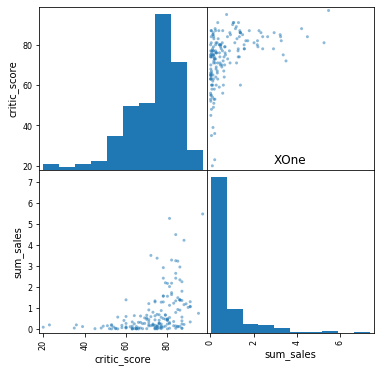

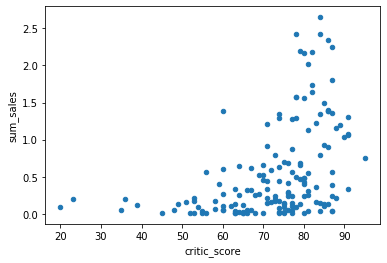

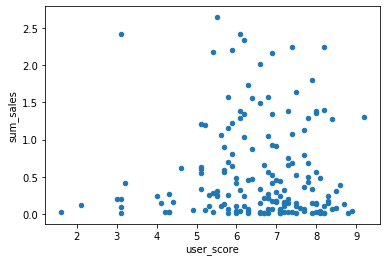

Корреляция между оценка критиков и продажами для платформы XOne:  0.4169983280084017
Корреляция между оценками пользователей и продажами для платформы XOne:  -0.06892505328279414


In [12]:
df_XOne=df.query('platform=="XOne"')[['critic_score','user_score','sum_sales']]
pd.plotting.scatter_matrix(df_XOne, figsize=(6, 6))
plt.title('XOne')
plt.show()
df_XOne_user=df_XOne.query('~(user_score=="tbd")')[['user_score','sum_sales']]
df_XOne_user['user_score']=df_XOne_user['user_score'].astype('float')
min_sales1=df_XOne['sum_sales'].quantile(0.95)
df_XOne.query('sum_sales<@min_sales1').plot(kind='scatter', x='critic_score', y='sum_sales')
df_XOne_user.query('sum_sales<@min_sales1').plot(kind='scatter', x='user_score', y='sum_sales')
plt.show()
print("Корреляция между оценка критиков и продажами для платформы XOne: ", df_XOne['critic_score'].corr(df_XOne['sum_sales']))
print("Корреляция между оценками пользователей и продажами для платформы XOne: ", df_XOne_user['user_score'].corr(df_XOne_user['sum_sales']))


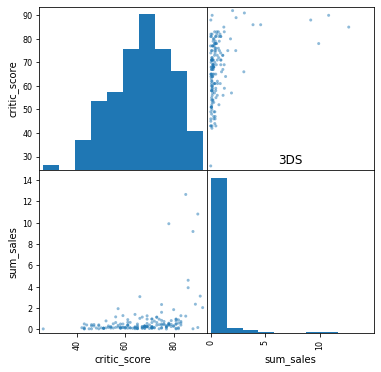

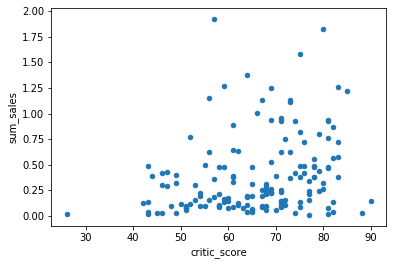

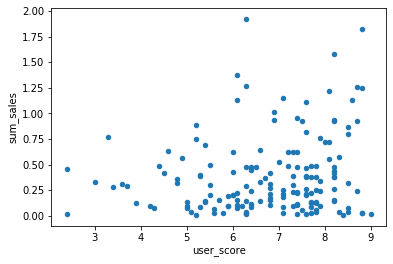

Корреляция между оценка критиков и продажами для платформы 3DS:  0.3487397305984834
Корреляция между оценками пользователей и продажами для платформы 3DS:  0.22207843643390882


In [13]:
df_3DS=df.query('platform=="3DS"')[['critic_score','user_score','sum_sales']]
pd.plotting.scatter_matrix(df_3DS, figsize=(6, 6))
plt.title('3DS')
plt.show()
df_3DS_user=df_3DS.query('~(user_score=="tbd")')[['user_score','sum_sales']]
df_3DS_user['user_score']=df_3DS_user['user_score'].astype('float')
min_sales2=df_3DS['sum_sales'].quantile(0.95)
df_3DS.query('sum_sales<@min_sales2').plot(kind='scatter', x='critic_score', y='sum_sales')
df_3DS_user.query('sum_sales<@min_sales2').plot(kind='scatter', x='user_score', y='sum_sales')
plt.show()
print("Корреляция между оценка критиков и продажами для платформы 3DS: ", df_3DS['critic_score'].corr(df_3DS['sum_sales']))
print("Корреляция между оценками пользователей и продажами для платформы 3DS: ", df_3DS_user['user_score'].corr(df_3DS_user['sum_sales']))

Данные анализа продаж игр на других платформах(3DS и XOne) имеют тот же характер, что и для платформы PS4. 

#### Общее распределение игр по жанрам

In [14]:
display(df)
print(df['genre'].unique())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


['Misc' 'Action' 'Role-Playing' 'Shooter' 'Racing' 'Platform' 'Simulation'
 'Sports' 'Fighting' 'Strategy' 'Adventure' 'Puzzle']


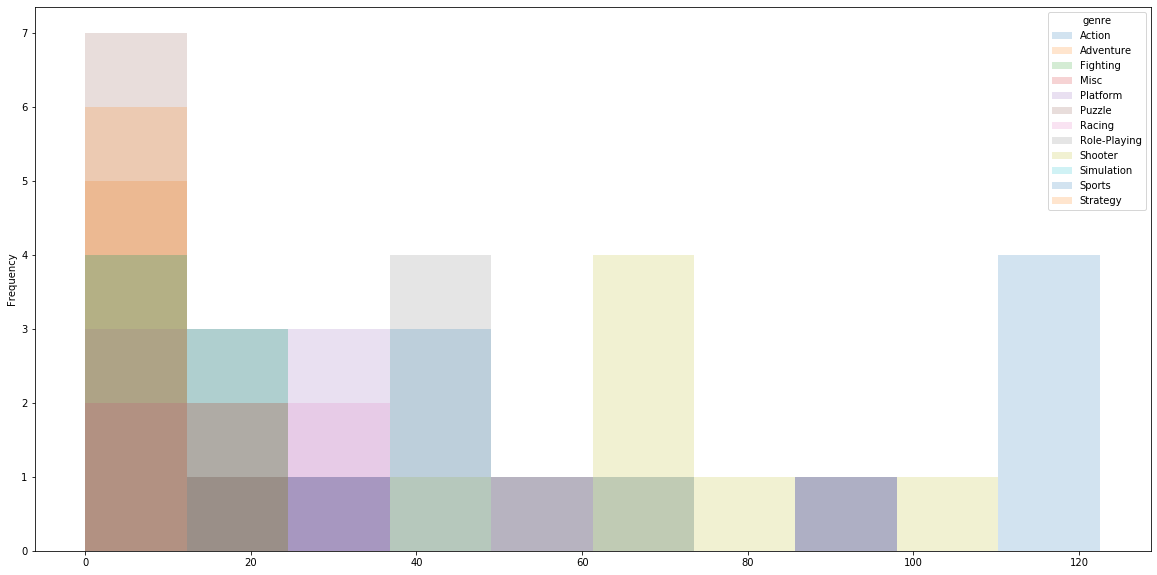

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2010,115.29,15.96,14.69,95.14,31.04,10.75,34.37,69.65,76.83,21.49,91.24,13.68
2011,116.68,15.61,22.41,54.38,27.68,4.96,34.81,52.83,98.18,15.14,56.08,8.82
2012,119.25,5.79,9.18,22.22,18.37,1.72,13.61,46.91,71.75,13.36,30.42,3.26
2013,122.51,6.09,7.09,25.27,24.54,0.96,12.37,44.45,62.04,8.63,41.17,6.12
2014,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.58,45.15,0.98
2015,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


In [15]:
table11=pd.pivot_table(df, index='year_of_release',columns='genre', values='sum_sales', aggfunc='sum')
table11.plot(kind='hist',figsize=(20,10), alpha=0.2)
plt.show()
display(pd.pivot_table(df, index='year_of_release',columns='genre', values='sum_sales', aggfunc='sum'))

Из анализа данных за актуальный период можно сделать вывод, что самыми продающимися являются жанры: action, role-playing, shooter и sports.

### 4. Портрет пользователя каждого региона <a id='4'></a>

In [16]:
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


#### Северная Америка

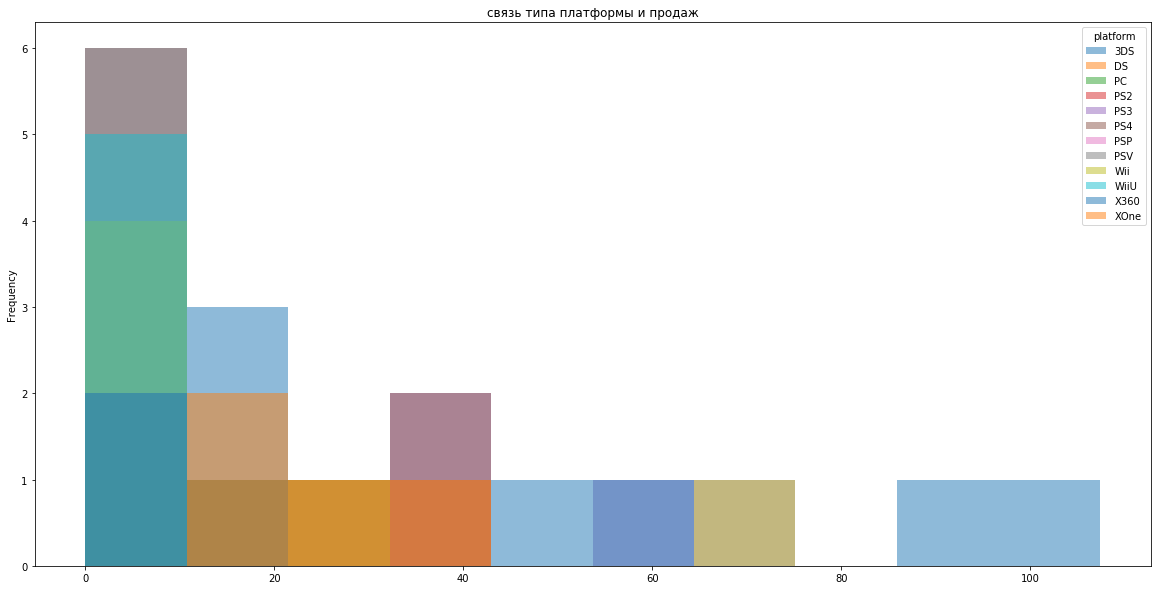

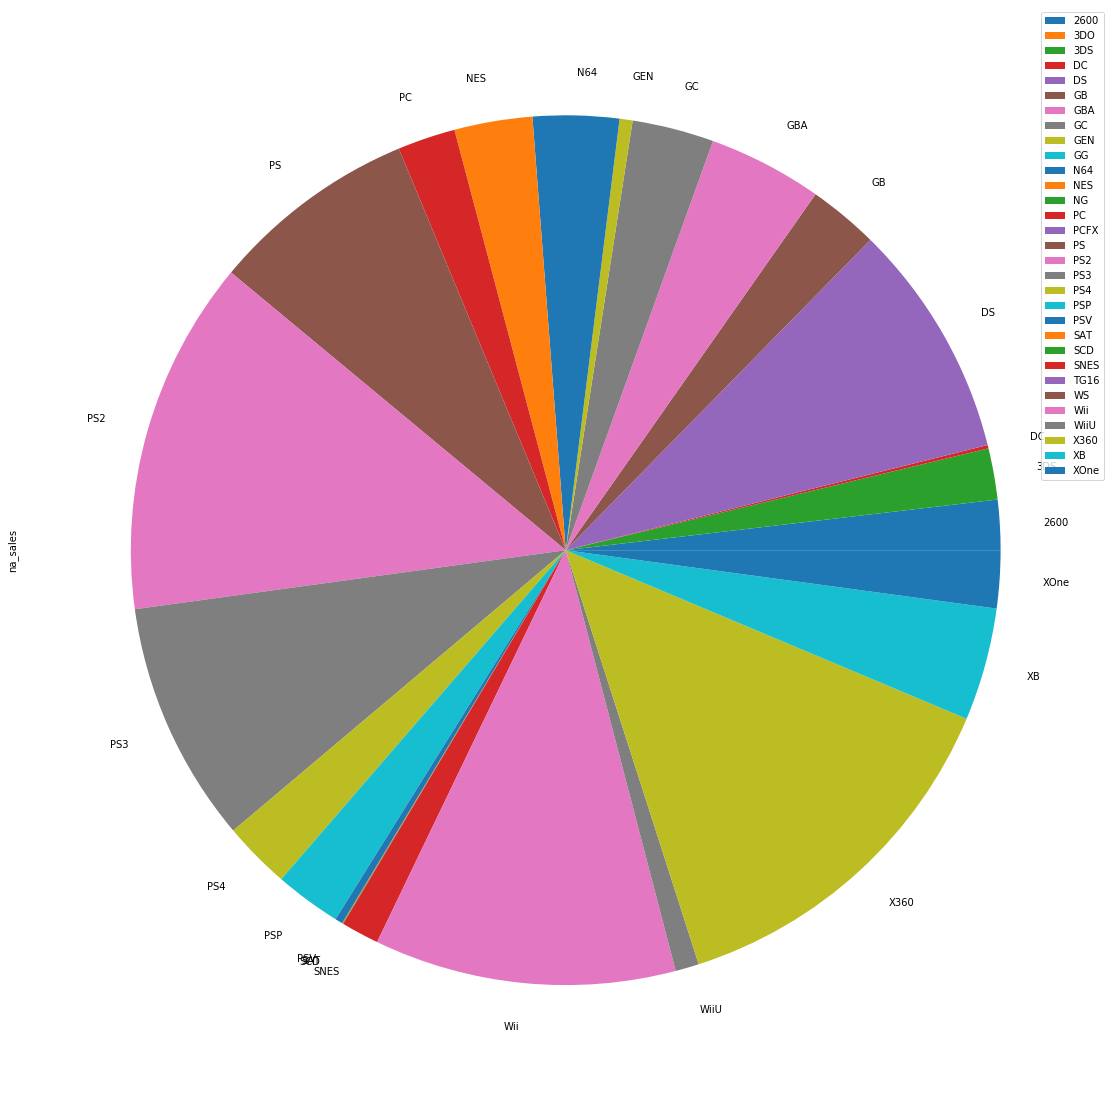

Платформы с наибольшими суммарными продажами в Северной Америке:  Index(['X360', 'PS2', 'Wii', 'PS3', 'DS'], dtype='object', name='platform')
          na_sales
platform          
X360        595.74
PS2         572.92
Wii         486.87
PS3         390.13
DS          380.31
Наиболее популярные жанры в Северной Америке:
              na_sales
genre                 
Action          290.64
Shooter         237.47
Sports          156.81
Misc            123.80
Role-Playing    112.05


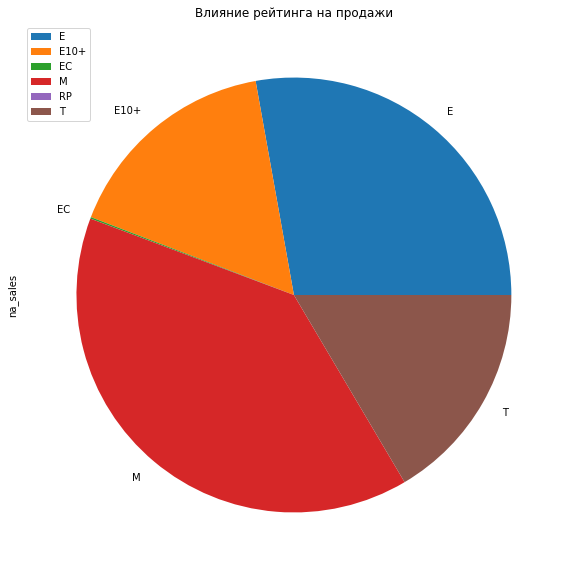

In [17]:
pd.pivot_table(df, index='year_of_release',columns='platform', values='na_sales', aggfunc='sum').plot(kind='hist',alpha=0.5,figsize=(20,10))
plt.title('связь типа платформы и продаж')
plt.show()
piv_tna=pd.pivot_table(data, index=['platform'], values='na_sales', aggfunc='sum')
piv_tna.plot(kind='pie',y='na_sales',figsize=(20,20))
plt.show()
top5_na=piv_tna.sort_values(by='na_sales', ascending=False).head(5)
print("Платформы с наибольшими суммарными продажами в Северной Америке: ", top5_na.index)
print(top5_na)
piv_genre_na=pd.pivot_table(df, index='genre', values='na_sales', aggfunc='sum')
top5_genre_na=piv_genre_na.sort_values(by='na_sales', ascending=False).head(5)
print("Наиболее популярные жанры в Северной Америке:")
print(top5_genre_na)
t22=pd.pivot_table(df, index='year_of_release',columns='rating', values='na_sales', aggfunc='sum')
t222=pd.pivot_table(df, index='rating', values='na_sales', aggfunc='sum')
t222.plot(kind='pie',y='na_sales',figsize=(20,10))
plt.title('Влияние рейтинга на продажи')
plt.show()

В Северной Америке в актуальном периоде(2014-2016гг) наиболее популярными являлись платформы: x360, ps2, wii, ps3, ds. Наиболее продающимися жанрами в Северной Америке стали: shooter, action, sports, role-playing, misc.

#### Европа 

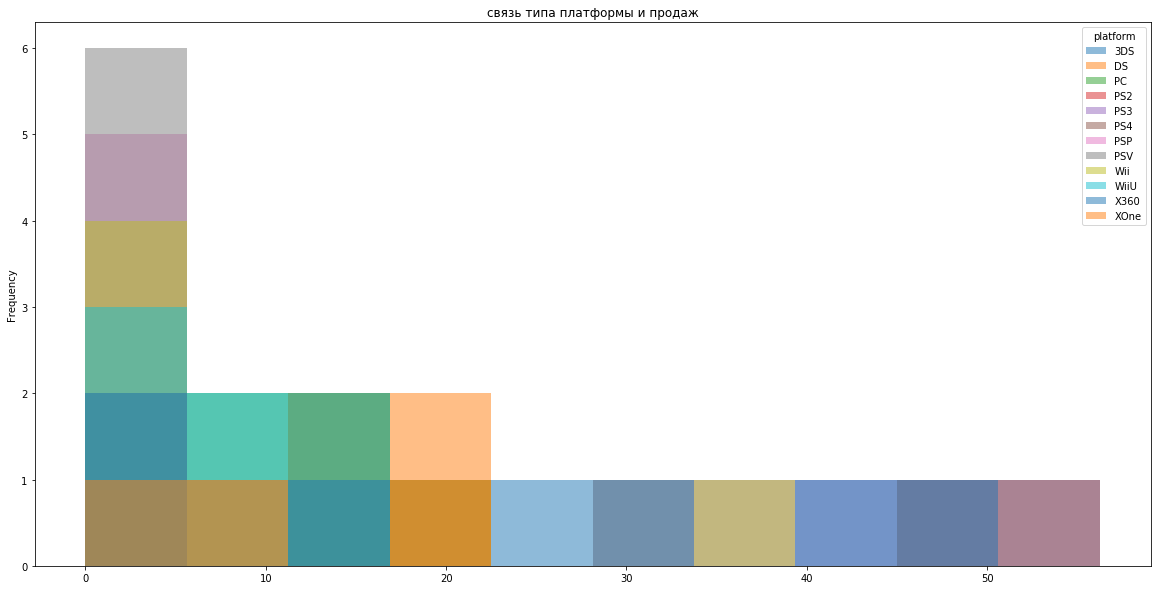

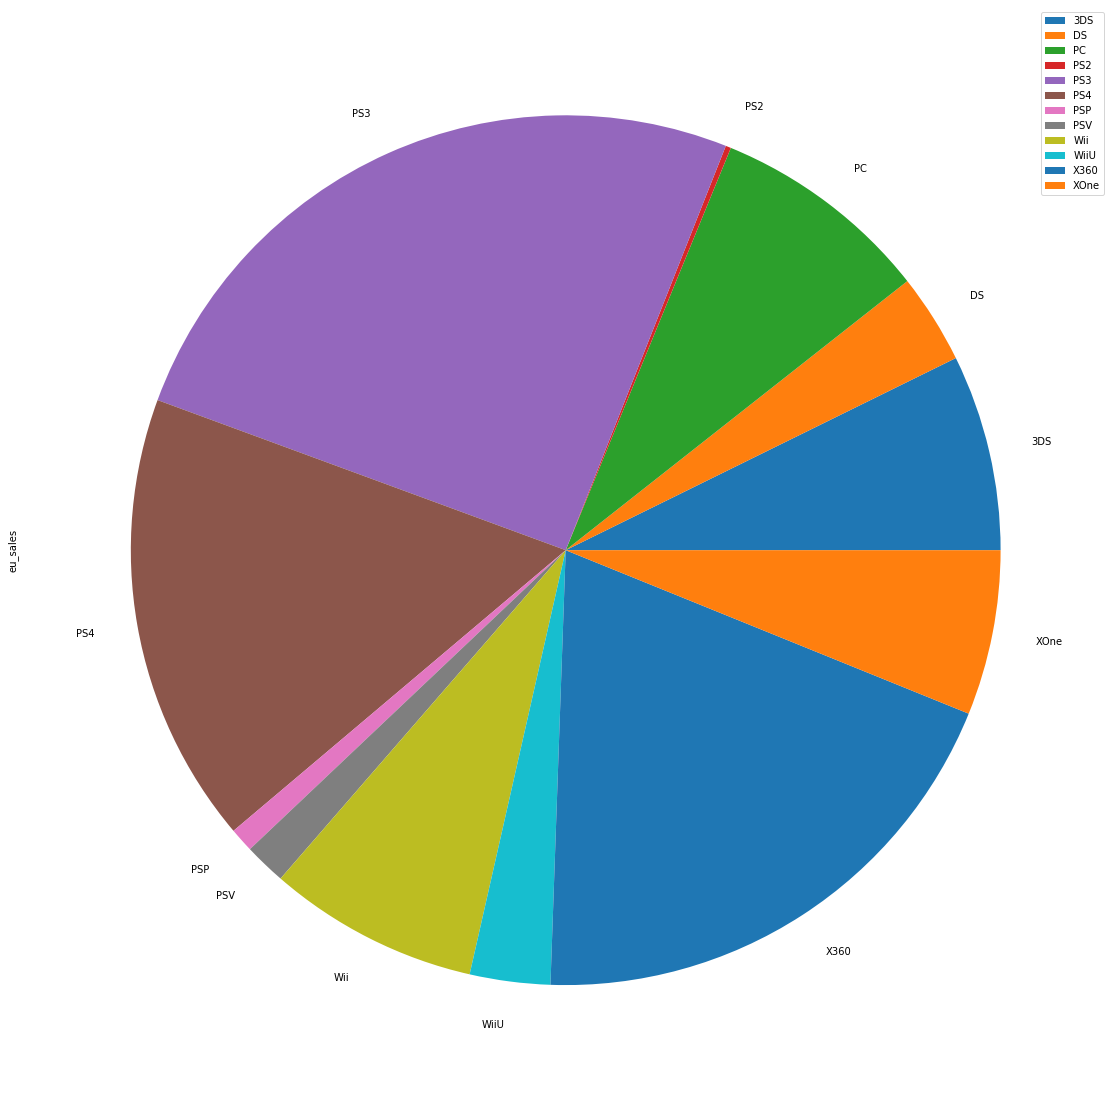

Платформы с наибольшими суммарными продажами в Европе:  Index(['PS2', 'PS3', 'X360', 'Wii', 'PS'], dtype='object', name='platform')
          eu_sales
platform          
PS2         332.63
PS3         327.21
X360        268.32
Wii         258.32
PS          212.39
Наиболее популярные жанры в Европе:
              eu_sales
genre                 
Action          233.63
Shooter         171.45
Sports          116.84
Role-Playing     75.48
Misc             66.09


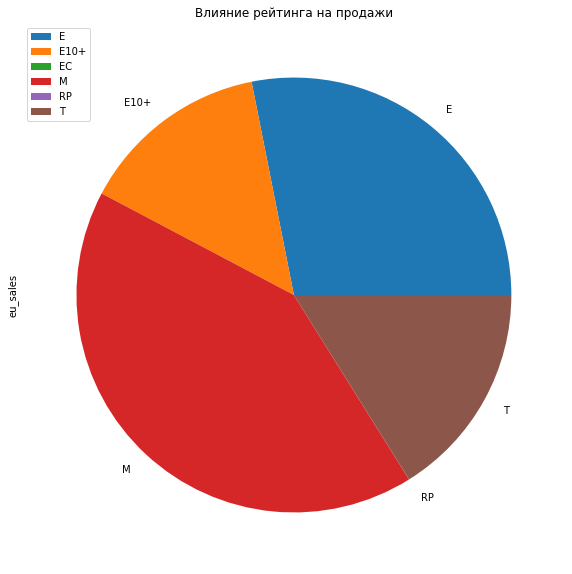

In [18]:
pd.pivot_table(df, index='year_of_release',columns='platform', values='eu_sales', aggfunc='sum').plot(kind='hist', alpha=0.5,figsize=(20,10))
plt.title('связь типа платформы и продаж')
plt.show()
piv_teu=pd.pivot_table(data, index=['platform'], values='eu_sales', aggfunc='sum')
pd.pivot_table(df, index=['platform'], values='eu_sales', aggfunc='sum').plot(kind='pie',y='eu_sales',figsize=(20,20))
plt.show()
top5_eu=piv_teu.sort_values(by='eu_sales', ascending=False).head(5)
print("Платформы с наибольшими суммарными продажами в Европе: ", top5_eu.index)
print(top5_eu)
piv_genre_eu=pd.pivot_table(df, index='genre', values='eu_sales', aggfunc='sum')
top5_genre_eu=piv_genre_eu.sort_values(by='eu_sales', ascending=False).head(5)
print("Наиболее популярные жанры в Европе:")
print(top5_genre_eu)
#pd.pivot_table(df, index='year_of_release',columns='rating', values='eu_sales', aggfunc='sum').plot(figsize=(20,10))
t222eu=pd.pivot_table(df, index='rating', values='eu_sales', aggfunc='sum')
t222eu.plot(kind='pie',y='eu_sales',figsize=(20,10))
plt.title('Влияние рейтинга на продажи')
plt.show()

В Европе в актуальном периоде (2014-2016гг) наиболее популярными платформами стали: ps2, ps3, x360, wii  и ps. Наиболее популярными жанрами в Европе стали: action, shooter, sports,role-playing, racing.

#### Япония

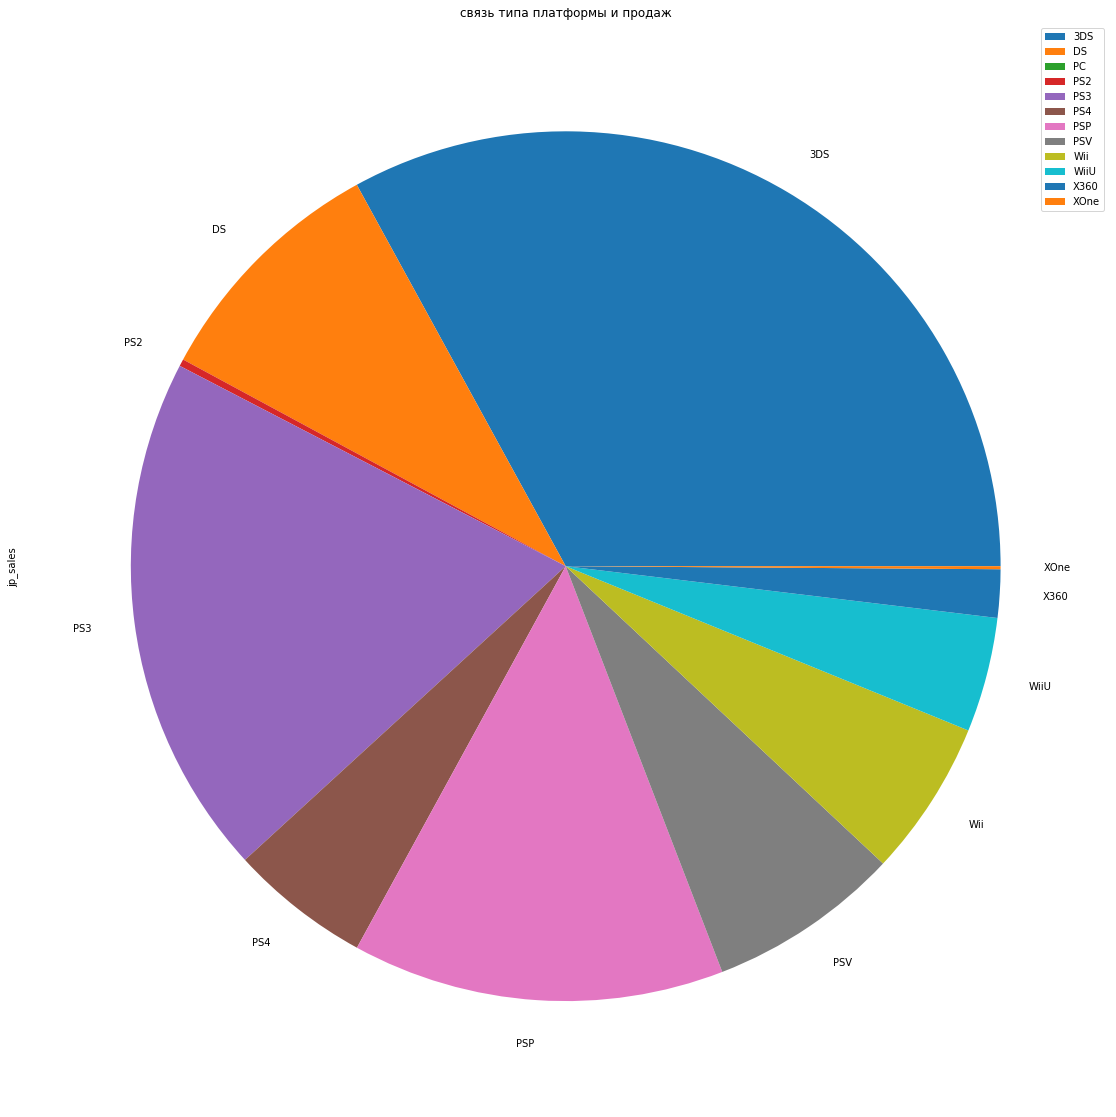

Платформы с наибольшими суммарными продажами в Японии:  Index(['DS', 'PS', 'PS2', 'SNES', '3DS'], dtype='object', name='platform')
          jp_sales
platform          
DS          175.02
PS          139.78
PS2         137.54
SNES        116.55
3DS         100.62
Наиболее популярные жанры в Японии:
              jp_sales
genre                 
Role-Playing    103.54
Action           72.20
Misc             24.29
Platform         15.81
Adventure        15.67


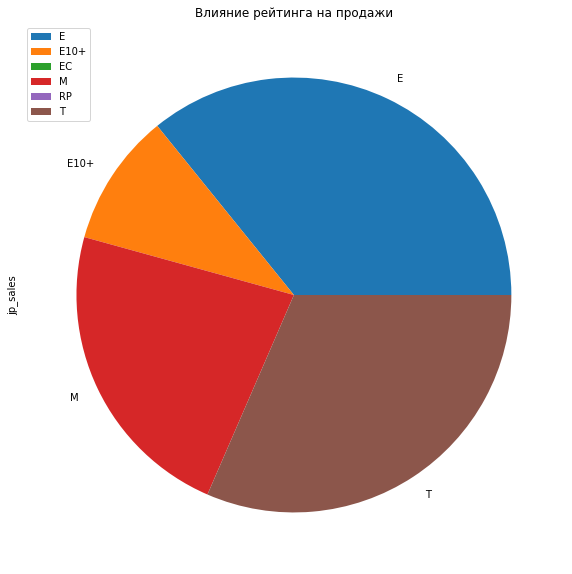

In [19]:
pd.pivot_table(df, index=['platform'], values='jp_sales', aggfunc='sum').plot(kind='pie',y='jp_sales',figsize=(20,20))
plt.title('связь типа платформы и продаж')
plt.show()
piv_tjp=pd.pivot_table(data, index=['platform'], values='jp_sales', aggfunc='sum')
top5_jp=piv_tjp.sort_values(by='jp_sales', ascending=False).head(5)
print("Платформы с наибольшими суммарными продажами в Японии: ", top5_jp.index)
print(top5_jp)
piv_genre_jp=pd.pivot_table(df, index='genre', values='jp_sales', aggfunc='sum')
top5_genre_jp=piv_genre_jp.sort_values(by='jp_sales', ascending=False).head(5)
print("Наиболее популярные жанры в Японии:")
print(top5_genre_jp)
pd.pivot_table(df, index='rating', values='jp_sales', aggfunc='sum').plot(kind='pie',y='jp_sales',figsize=(20,10))
plt.title('Влияние рейтинга на продажи')
plt.show()

В Японии наиболее продающимися в 2014-2016гг стали игры на платформах: ds, ps, ps2, snes, 3ds. Наиболее продающимися жанрами в Японии стали: role-playing, action, fighting, misc, shooter.

В результате анализа популярности платформ по регионам в актуальном периоде(2014-2016гг) можно сделать вывод, что игры на ps2 пользуются популярностью везде, игры на x360, wii, ps3 - только в Северной Америке и Европе, а на ds - в Европе и в Японии. Стоит отметить, что, в отличии от Северной Америки и Европы, в Японии пользуются полулярностью также игры на ps, snes и 3ds. 
В Северной Америке в актуальном периоде(2014-2016гг) наиболее популярными являлись платформы: x360, ps2, wii, ps3, ds. Анализ продаж в зависимости от жанра игр показал, что shooter, role-playing и action пользуются популярностью во всех регионах, в Европе и Северной Америке пользуется популярностью жанр sports, в Японии и Северной Америке - misc. Во всех трёх регионах наиболее продаваемые игры имеют рейтинг M, но в то же время везде популярны игры с рейтингами T и E. Стоит отметить, что в Северной Америке продажи игр с рейтингом E падают, а с рейтингом E - наибирают популярность.

###  5. Проверка гипотез <a id='5'></a>

#### Гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PС одинаковые

In [20]:
from scipy import stats as st 
table_xone=df.query('platform=="XOne"')[['user_score']]
xone=table_xone.query('~(user_score=="tbd")')
xone=xone.astype('float')
xone1=xone.query('user_score>=0')

table_pc=df.query('platform=="PC"')[['user_score']]
pc=table_pc.query('~(user_score=="tbd")')
pc=pc.astype('float')
pc1=pc.query('user_score>=0')

alpha=0.05
results = st.ttest_ind(pc1['user_score'],xone1['user_score']) 

print('p-значение: ', results.pvalue)
if (results.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

p-значение:  0.980998110649032
Принимаем нулевую гипотезу


Проверим нулевую гипотезу H0: средние пользовательские рейтинги платформ Xbox One и PC равны. В результате анализа выборок за актуальный период (2014-2016гг) получили р-значение около 0,1, что больше порогового, равного 5%. Вывод: нулевую гипотезу следует принять, т.е средние пользовательские рейтинги платформ Xbox One и PC равны.

#### Гипотеза 2: средние пользовательские рейтинги жанров Action и Sports разные

In [21]:
from scipy import stats as st 
table_action=df.query('genre=="Action"')[['user_score']]
action=table_action.query('~(user_score=="tbd")')
action=action.astype('float')
act1=xone.query('user_score>=0')

table_sport=df.query('genre=="Sports"')[['user_score']]
sport=table_sport.query('~(user_score=="tbd")')
sport=sport.astype('float')
sport1=sport.query('user_score>=0')

alpha=0.05
results = st.ttest_ind(sport1['user_score'],act1['user_score'],equal_var = False) 

print('p-значение: ', results.pvalue)
if (results.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

p-значение:  1.1343230639275749e-05
Отвергаем нулевую гипотезу


Проверим нулевую гипотезу H0: средние пользовательские рейтинги жанров Action и Sports разные. В результате анализа выборок за актуальный период (2014-2016гг) получили р-значение около 0, что меньше порогового, равного 5%. Можно сделать вывод: нулевую гипотезу следует отвергнуть, т.е средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

###  6. Общий вывод <a id='6'></a>

В результате анализа было найдено, что до 1993 выпускалось немного игр, резкий рост начался после 1993 и максимальное значение было достигнуто в 2007-2008гг, затем производство игр пошло на спад. Т.к. цель проекта-планирование кампании на 2017г, то интерес представляют последние года, имеющие примерно одинаковый характер (т.е. 2014, 2015 и 2016г). Этот период (2014-2016гг) в настоящем анализе считался актуальным. 
В результате анализа были сделаны сдедующие выводы: **1** в среднем, характерный срок жизни платформы составляет около 6 лет. **2** продажи игр на всех платформах падают или остаются на том же уровне. На 1м месте по продажам **PS4**, на 2м - **XOne**, на 3м - **3DS**. Продажи игр на платформе **Wii** пусть относительно других не высокие, но на протяжении 3 лет стабильные: не растут, но и не падают. За счёт этой особенности платформу **Wii** также можно считать потенциально прибыльной. **3** Видна достаточно четкая зависимость между оценками и суммарными продажами. **4** Самыми продающимися являются жанры: action, role-playing, shooter и sports.**5** Игры на ps2 пользуются популярностью везде, игры на x360, wii, ps3 - только в Северной Америке и Европе, а на ds - в Европе и в Японии. Стоит отметить, что, в отличии от Северной Америки и Европы, в Японии пользуются полулярностью также игры на ps, snes и 3ds. В Северной Америке в актуальном периоде(2014-2016гг) наиболее популярными являлись платформы: x360, ps2, wii, ps3, ds. **6** Анализ продаж в зависимости от жанра игр показал, что shooter, role-playing и action пользуются популярностью во всех регионах, в Европе и Северной Америке пользуется популярностью жанр sports, в Японии и Северной Америке - misc. **7** Во всех трёх регионах наиболее продаваемые игры имеют рейтинг M, но в то же время везде популярны игры с рейтингами T и E. Стоит отметить, что в Северной Америке продажи игр с рейтингом E падают, а с рейтингом E - наибирают популярность.
В ходе анализа была сформулирована и проверена гипотеза H0: средние пользовательские рейтинги платформ Xbox One и PC равны. В результате анализа выборок за актуальный период (2014-2016гг) получили р-значение около 0,1, что больше порогового, равного 5%. Вывод: нулевую гипотезу следует принять, т.е средние пользовательские рейтинги платформ Xbox One и PC равны.
Также была сформулирована и проверена гипотеза H0: средние пользовательские рейтинги жанров Action и Sports разные. В результате анализа выборок за актуальный период (2014-2016гг) был  вывод: нулевую гипотезу следует принять, т.е средние пользовательские рейтинги платформ Xbox One и PC разные.

В результате анализа данных за актуальный период(2014-2016гг) можно сделать вывод, что потенциально популярным продуктом можно считать игры на платформах: **PS4**, **XOne**, **3DS**, **PS2**, **Wii**, как наиболее перспективные можно выделить жанры: **shooter**, **role-playing** и **action**, наиболее перспективные игры имеют рейтинги: **M** , **T** и **E**.